In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper", font_scale=2)
    # Set the font to be serif, rather than sans
    sns.set(font="serif")
    # Make the background white, and specify the
    # specific font family
    sns.set_style(
        "white",
        {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]},
    )
    sns.set_style("ticks")
    sns.set_style("whitegrid")


Text(0, 0.5, 'Time[ms]')

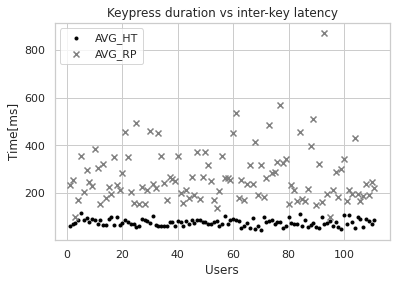

In [20]:

df = pd.read_csv("sapipin_to_clustering_111.csv")
# df.describe()
 
df = df[['AVG_HT', 'AVG_RP']]

set_style()

x_range = [i for i in range(1,112)]
plt.scatter(x_range, df['AVG_HT'], marker='.', color='black')
plt.scatter(x_range, df['AVG_RP'], marker='x', color ='gray')
# Add Title and Labels
plt.legend(labels=["AVG_HT", "AVG_RP"])
plt.title('Keypress duration vs inter-key latency')
plt.xlabel('Users')
plt.ylabel('Time[ms]')

Text(0, 0.5, 'AVG(RP)/AVG(HT)')

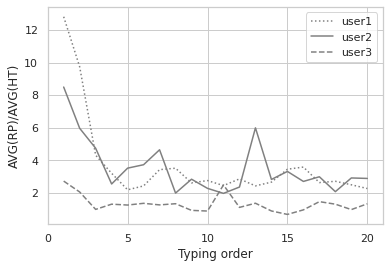

In [22]:
df = pd.read_csv("sapipin_no_outliers_avgs.csv")
df = df[['AVG_RP_AVG_HT_RATIO', 'user']]

df_user1 = df[df['user'].isin([1])]
df_user2 = df[df['user'].isin([2])]
df_user3 = df[df['user'].isin([3])]

x_range = [i for i in range(1,21)]
sns.lineplot(data=df_user1, x=x_range, y = 'AVG_RP_AVG_HT_RATIO', linestyle=':', color = 'grey')
sns.lineplot(data=df_user2, x=x_range, y = 'AVG_RP_AVG_HT_RATIO', linestyle='-', color = 'grey')
ax = sns.lineplot(data=df_user3, x=x_range, y = 'AVG_RP_AVG_HT_RATIO', linestyle='--', color = 'grey')
ax.set_xticks(ax.get_xticks()[::2])
plt.legend(labels=["user1", "user2", "user3"])
plt.xlabel('Typing order')
plt.ylabel('AVG(RP)/AVG(HT)')


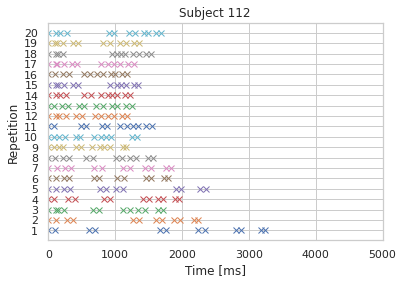

In [30]:
df = pd.read_csv("sapipin_no_outliers.csv")
users = set(df['user'])

maxtime = 5000
set_style()

for user in users:
    plt.clf()
    df_user = df[ df['user'].isin([user])]
    df_user.describe()

    typing_times = [  ]    
    startindex = 1

    counter = 0
    for index, row in df_user.iterrows():
        counter = counter + 1
        if counter >= startindex:
            t0 = 0
            t1 = t0 + row['HT1']
            t2 = t1 + row['RP1'] 

            t3 = t2 + row['HT2'] 
            t4 = t3 + row['RP2'] 

            t5 = t4 + row['HT3'] 
            t6 = t5 + row['RP3'] 

            t7 = t6 + row['HT4'] 
            t8 = t7 + row['RP4'] 

            t9 = t8 + row['HT5'] 
            t10 = t9 + row['RP5']

            t11 = t10 + row['HT6']

            sample = [t0, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11]
            y = np.full(12, counter)
            ax = plt.plot(sample, y, 'x')
            typing_times.append( sample)

    plt.yticks(np.arange(startindex, 21, 1))
    plt.ylabel('Repetition')
    plt.xlabel('Time [ms]')
    plt.xlim(-10, maxtime)
    plt.title('Subject ' + str(user) )
    plt.savefig("output_png/subject_" + str(user))



        

        